<a href="https://colab.research.google.com/github/carolfazani/orcamento_sp/blob/main/Preparando_os_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [415]:
import pandas as pd
import numpy as np

#1. Coletando os dados:

Para realizar nossa análise orçamentária vamos utilizar os balanços orçamentários do município de São Paulo referentes aos anos de 2017, 2018, 2019, 2020 e 2021, ambos disponíveis no sítio: https://www.prefeitura.sp.gov.br/cidade/secretarias/fazenda/contaspublicas/index.php?p=3212

Eu editei as tabelas e as deixei apenas com os dados sobre a arrecadação de receitas. As tabelas editadas você encontra neste link: https://github.com/carolfazani/orcamento_sp/tree/main/balancos



#2. Limpando os dados:

2.1 Lendo os arquivos em xlsx e os tranformando em dataframes

In [416]:
files = ('r2017.xlsx', 'r2018.xlsx', 'r2019.xlsx', 'r2020.xlsx', 'r2021.xlsx')
years = ('2017', '2018', '2019', '2020', '2021')
df ={}
for year,file in zip(years, files):
    df[year] = pd.read_excel(file, index_col = 0)
    print(f'shape: {df[year].shape}')


shape: (31, 4)
shape: (31, 4)
shape: (31, 4)
shape: (31, 4)
shape: (31, 4)


2.2 Renomeando as colunas

In [417]:

for year in years:
  df[year].columns = ['Previsão_Inicial', 'Previsão_Atualizada',
       'Receitas_Realizadas', 'Saldo']


2.3 Inserindo uma nova coluna

In [418]:
for year in years:
  df[year].insert(0, 'Categoria', (np.nan))

In [419]:
df['2021'].columns

Index(['Categoria', 'Previsão_Inicial', 'Previsão_Atualizada',
       'Receitas_Realizadas', 'Saldo'],
      dtype='object')

2.4 Conferindo se nossos índices são iguais

In [420]:
#capturando os objetos Index
idx17 = df['2017'].index
idx18 = df['2018'].index
idx19 = df['2019'].index
idx20 = df['2020'].index
idx21 = df['2021'].index



In [421]:
type(idx17)

pandas.core.indexes.base.Index

In [422]:
#todos indices colocados dentro dos parenteses retornaram True
idx17.equals(idx21)

True

2.5 Removendo linhas

In [423]:
for year in years:
    df[year] = df[year].drop(['RECEITAS  CORRENTES (I)', 'RECEITAS DE CAPITAL (II)','SUBTOTAL DAS RECEITAS (III) = ( I + II)', 'OPERAÇÕES DE CRÉDITO / REFINANCIAMENTO (IV)','TOTAL (VII) = (V + VI)', 'Saldos de Exercícios Anteriores (Utilizados para Créditos', 'Adicionais)','SUBTOTAL COM REFINANCIAMENTO (V) = (III + IV)','Deficit (VI)'])


2.6 Tratando valores nulos

In [424]:
for year in years:
    df[year].loc[df[year]['Previsão_Inicial'] == '-', 'Previsão_Inicial'] = 0
    df[year].loc[df[year]['Previsão_Atualizada'] == '-', 'Previsão_Atualizada'] = 0
    df[year].loc[df[year]['Receitas_Realizadas'] == '-', 'Receitas_Realizadas'] = 0
    df[year].loc[df[year]['Saldo'] == '-', 'Saldo'] = 0

In [425]:
df['2017'].dtypes

Categoria              float64
Previsão_Inicial        object
Previsão_Atualizada     object
Receitas_Realizadas     object
Saldo                   object
dtype: object

2.7 Alterando os tipos de valores

In [426]:
for year in years:
    df[year]['Previsão_Inicial'] = df[year]['Previsão_Inicial'].astype(float)
    df[year]['Previsão_Atualizada'] = df[year]['Previsão_Atualizada'].astype(float)
    df[year]['Receitas_Realizadas'] = df[year]['Receitas_Realizadas'].astype(float)
    df[year]['Saldo'] = df[year]['Saldo'].astype(float)

In [427]:
df['2018'].dtypes

Categoria              float64
Previsão_Inicial       float64
Previsão_Atualizada    float64
Receitas_Realizadas    float64
Saldo                  float64
dtype: object

2.8 Verificando duplicados

In [428]:
print(idx17.duplicated(keep = False))
print(idx18.duplicated(keep = False))
print(idx19.duplicated(keep = False))
print(idx20.duplicated(keep = False))
print(idx21.duplicated(keep = False))

[False False False False False False False False False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False]


In [429]:
for year in years:
  print(f'shape: {df[year].shape}')

shape: (22, 5)
shape: (22, 5)
shape: (22, 5)
shape: (22, 5)
shape: (22, 5)


In [430]:
for year in years:
    df[year] = df[year][~df[year].index.duplicated(keep='first')]

In [431]:
#capturando os novos indices
idx17 = df['2017'].index
idx18 = df['2018'].index
idx19 = df['2019'].index
idx20 = df['2020'].index
idx21 = df['2021'].index

In [432]:
print(idx17.duplicated(keep = False))
print(idx18.duplicated(keep = False))
print(idx19.duplicated(keep = False))
print(idx20.duplicated(keep = False))
print(idx21.duplicated(keep = False))

[False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False]


In [433]:
for year in years:
  print(f'shape: {df[year].shape}')

shape: (20, 5)
shape: (20, 5)
shape: (20, 5)
shape: (20, 5)
shape: (20, 5)


#3. Classificando os dados

In [434]:
#classifica as receitas por categoria
for year in years:
  df[year].loc[0:8,'Categoria'] = "RECEITAS CORRENTE"
  df[year].loc[8:13, 'Categoria'] ='RECEITAS DE CAPITAL'
  df[year].loc[13:17, 'Categoria'] = 'OPERAÇÕES DE CRÉDITO'
  df[year].loc[17:20, 'Categoria'] = 'SALDOS ANTERIORES'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


#4. Correção monetária pela variação do IPCA

Para analisar os dados orçamentários, primeiro vamos corrigi-los pelo IPCA, mais informações sobre ele você encontra nesse link:  https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?edicao=20932&t=series-historicas

In [435]:

IPCA= {}
deflator = 1.24, 1.20, 1.15, 1.10, 1.00
for year, defl in zip(years, deflator):
  IPCA[year] = defl


In [436]:

for year in years:
    df[year]['Previsão_Inicial'] = df[year]['Previsão_Inicial'].mul(IPCA[year])
    df[year]['Previsão_Atualizada'] = df[year]['Previsão_Atualizada'].mul(IPCA[year])
    df[year]['Receitas_Realizadas'] = df[year]['Receitas_Realizadas'].mul(IPCA[year])
    df[year]['Saldo'] = df[year]['Saldo'].mul(IPCA[year])


#5. Criando variáveis de análise

As tabelas originais continham linhas com a soma de alguns valores da nossa tabela, essas linhas foram excluidas na etapa da limpeza e agora vamos criar variáveis que vão armazenar esses mesmos valores. 

5.1 Valores por categoria

In [437]:
'''
guarda a soma de cada coluna por categoria em uma variável, equivalem as linhas RECEITAS  CORRENTES (I), RECEITAS DE CAPITAL (II),
OPERAÇÕES DE CRÉDITO EXTERNAS e Saldos de Exercícios Anteriores da tabela original.
'''
inicial ={}
atualizada = {}
realizada = {}
saldo = {}
for year in years:
    inicial[f'{year}'] = df[year].groupby('Categoria')['Previsão_Inicial'].sum().reset_index(name='Previsão_Inicial')
    atualizada[f'{year}'] = df[year].groupby('Categoria')['Previsão_Atualizada'].sum().reset_index(name='Previsão_Atualizada')
    realizada[f'{year}'] = df[year].groupby('Categoria')['Receitas_Realizadas'].sum().reset_index(name='Receitas_Realizadas')
    saldo[f'{year}'] = df[year].groupby('Categoria')['Saldo'].sum().reset_index(name='Saldo')

In [438]:
inicial['2018']

,Categoria,Previsão_Inicial
0,OPERAÇÕES DE CRÉDITO,0.000000e+00
1,RECEITAS CORRENTE,6.258866e+10
2,RECEITAS DE CAPITAL,5.008014e+09
3,SALDOS ANTERIORES,4.800000e+07


In [439]:
atualizada['2018']

,Categoria,Previsão_Atualizada
0,OPERAÇÕES DE CRÉDITO,0.000000e+00
1,RECEITAS CORRENTE,6.258866e+10
2,RECEITAS DE CAPITAL,5.008014e+09
3,SALDOS ANTERIORES,2.026738e+08


In [440]:
realizada['2018']

,Categoria,Receitas_Realizadas
0,OPERAÇÕES DE CRÉDITO,0.000000e+00
1,RECEITAS CORRENTE,6.288545e+10
2,RECEITAS DE CAPITAL,2.320167e+09
3,SALDOS ANTERIORES,1.546738e+08


In [441]:
saldo['2018']

,Categoria,Saldo
0,OPERAÇÕES DE CRÉDITO,0.000000e+00
1,RECEITAS CORRENTE,2.967896e+08
2,RECEITAS DE CAPITAL,-2.687848e+09
3,SALDOS ANTERIORES,-4.800000e+07


5.2 Valores Totais

In [442]:
'''equivalem a linha TOTAL (VII) = (V + VI) da tabela original, 
a c_realizada é a soma das receitas realizadas: correntes , de capital e operações de crédito
a c_saldo é o total realizado menos a soma das receitas atualizadas: correntes , de capital e operações de crédito '''

c_inicial ={}
c_atualizada = {}
c_realizada = {}
c_saldo = {}
for year in years:
  c_inicial[f'{year}'] = inicial[year]['Previsão_Inicial'].sum()
  c_atualizada[f'{year}'] = atualizada[year]['Previsão_Atualizada'].sum()
  c_realizada[f'{year}'] = realizada[year]['Receitas_Realizadas'].sum()-realizada[year]['Receitas_Realizadas'][3]
  c_saldo[f'{year}'] = (c_realizada[f'{year}'] - (c_atualizada[f'{year}'] - atualizada[year]['Previsão_Atualizada'][3:]))

In [443]:
print(c_inicial['2018'])
print(c_atualizada['2018'])
print(c_realizada['2019'])
print(c_saldo['2018'])

67644672674.39999
67799346522.05999
72124529530.39099
3   -2.391058e+09
Name: Previsão_Atualizada, dtype: float64


In [444]:
'''
equivale a linha TOTAL (VII) = (V + VI) da tabela original
'''

t_inicial ={}
t_atualizada = {}
t_realizada = {}
t_saldo = {}
for year in years:
  t_inicial[f'{year}'] = df[year]['Previsão_Inicial'].sum()
  t_atualizada[f'{year}'] = df[year]['Previsão_Atualizada'].sum()
  t_realizada[f'{year}'] = (df[year]['Receitas_Realizadas'].sum() - realizada[year]['Receitas_Realizadas'][3:]).astype(int)
  t_saldo[f'{year}'] = (t_realizada[f'{year}'] - (t_atualizada[f'{year}'] - atualizada[year]['Previsão_Atualizada'][3:])).astype(int)

In [445]:
print(t_inicial['2018'])
print(t_atualizada['2018'])
print(t_realizada['2018'])
print(t_saldo['2018'])

67644672674.399994
67799346522.06
3    65205614718
Name: Receitas_Realizadas, dtype: int64
3   -2391057956
dtype: int64


#6. Indicadores para análise

6.1 Quociente de execução da receita

Execução da Receita: Receita Executada/ Receita Prevista


* '1' = Receita executada é igual à receita prevista;
* '>1' = Receita executada é maior que a prevista, portanto,representa o excesso de arrecadação;
* '<1' = Receita executada é menor que a prevista, portanto,representa a falta de arrecadação.






*Quociente de execução da receita: Receita Executada Receita Prevista (Kohama, 2000, p. 144-148)*

In [446]:
q_execucao= {}
for year in years:
  q_execucao[f'{year}'] = t_realizada[f'{year}']/ t_inicial[f'{year}'] 
  print(type(q_execucao[f'{year}']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [447]:
q_execucao

{'2017': 3    0.946494
 Name: Receitas_Realizadas, dtype: float64, '2018': 3    0.963943
 Name: Receitas_Realizadas, dtype: float64, '2019': 3    1.035558
 Name: Receitas_Realizadas, dtype: float64, '2020': 3    0.966252
 Name: Receitas_Realizadas, dtype: float64, '2021': 3    1.127835
 Name: Receitas_Realizadas, dtype: float64}

In [448]:
q_execucao = pd.DataFrame(q_execucao)
q_execucao = q_execucao.T
q_execucao.columns = ['execução']

In [449]:
q_execucao.index

Index(['2017', '2018', '2019', '2020', '2021'], dtype='object')

6.2 Análise Horizontal

Analise Horizontal: Realizado/ Previsto *100.

Demonstra a variação entre a Receita Prevista e a Realizada

In [450]:
for year in years:
    df[year]['AH'] = round(df[year]['Receitas_Realizadas']/df[year]['Previsão_Inicial']*100, 2)


6.3 Análise Vertical

Análise Vertical: cada linha realizada/ total realizado *100.

Demonstra o peso de cada receita no total arrecadado.

In [451]:
for year in years:
    df[year]['AV'] = round(df[year]['Receitas_Realizadas'].div(c_realizada[year])*100, 2)

In [452]:
df['2017'].head(n=30)

,Categoria,Previsão_Inicial,Previsão_Atualizada,Receitas_Realizadas,Saldo,AH,AV
RECEITAS ORÇAMENTÁRIAS,,,,,,,
RECEITA TRIBUTÁRIA,RECEITAS CORRENTE,3.098723e+10,3.098723e+10,3.165459e+10,6.673591e+08,102.15,49.31
RECEITA DE CONTRIBUIÇÕES,RECEITAS CORRENTE,4.697278e+09,4.697278e+09,4.651160e+09,-4.611825e+07,99.02,7.25
RECEITA PATRIMONIAL,RECEITAS CORRENTE,1.258634e+09,1.258634e+09,1.226195e+09,-3.243882e+07,97.42,1.91
RECEITA AGROPECUÁRIA,RECEITAS CORRENTE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.00
RECEITA INDUSTRIAL,RECEITAS CORRENTE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.00
RECEITA DE SERVIÇOS,RECEITAS CORRENTE,7.730245e+08,7.730245e+08,6.781334e+08,-9.489108e+07,87.72,1.06
TRANSFERÊNCIAS CORRENTES,RECEITAS CORRENTE,1.807210e+10,1.807210e+10,1.750966e+10,-5.624353e+08,96.89,27.28
OUTRAS RECEITAS CORRENTES,RECEITAS CORRENTE,5.888677e+09,5.888677e+09,7.126218e+09,1.237541e+09,121.02,11.10
OPERAÇÕES DE CRÉDITO,RECEITAS DE CAPITAL,1.341779e+08,1.341779e+08,5.508162e+07,-7.909630e+07,41.05,0.09


#7. Elaboração de Gráficos

In [453]:
#TODO: arrumar eixo y, colcando em bilhões. grafico ah

7.1 Evolução da receita

In [454]:
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [455]:
serie ={}
for year in years:
  serie[year] = round(c_realizada[year], 2)

In [456]:
serie = pd.DataFrame([serie])
serie = serie.T


In [457]:
serie.head(n=10)

,0
2017,6.419243e+10
2018,6.520561e+10
2019,7.212453e+10
2020,7.332733e+10
2021,7.665070e+10


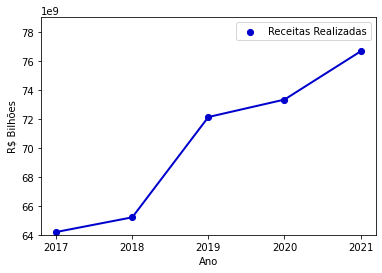

In [458]:
'''
Plotando o gráfico escolhendo o estilo de linha com linestyle e a expessura da mesma com linewidth
'''
plt.plot(serie, linestyle= '-', linewidth = 2, color = "mediumblue")
'''
Escolhendo o valor inicial e final do eixo y
'''
plt.ylim(64e9, 79e9)

#plt.grid()

'''
Colocando pontos e legendas nos valores
'''
plt.scatter(serie.index, serie[0], label = "Receitas Realizadas", color = "mediumblue", marker = ".", s =
150)
plt.legend()

'''
Rotulando os eixos y e x
'''
plt.ylabel('R$ Bilhões')
plt.xlabel('Ano')

'''
Colocando os valores na notação cientifica de 10^9
'''
plt.ticklabel_format(style='sci',axis='y',scilimits=(9,9))

plt.savefig('grafico1.png', transparent = True)



79.173.432.412,36
Bilhões

7.2 Evolução da receita por categoria

In [459]:
serie_credito= {}
serie_corrente= {}
serie_capital= {}
serie_saldos = {}
for year in years:
  #c_serie[year] = round(c_realizada[year], 2)
  serie_credito[year]=   realizada[year]['Receitas_Realizadas'][0]
  serie_corrente[year]=   realizada[year]['Receitas_Realizadas'][1]
  serie_capital[year]=   realizada[year]['Receitas_Realizadas'][2]
  serie_saldos[year] =   realizada[year]['Receitas_Realizadas'][3]



In [460]:
  serie_credito=   pd.DataFrame([serie_credito])
  serie_corrente=   pd.DataFrame([serie_corrente])
  serie_capital=   pd.DataFrame([serie_capital])
  serie_saldos =   pd.DataFrame([serie_saldos])


In [461]:
  serie_credito=   serie_credito.T
  serie_corrente=   serie_corrente.T
  serie_capital=   serie_capital.T
  serie_saldos =   serie_saldos.T
  
  
  
  

In [462]:
serie_saldos.head()

,0
2017,2.023454e+08
2018,1.546738e+08
2019,2.140512e+09
2020,2.279084e+09
2021,6.553710e+09


In [463]:
realizada['2021']['Receitas_Realizadas'][:]

0    0.000000e+00
1    7.308958e+10
2    3.561113e+09
3    6.553710e+09
Name: Receitas_Realizadas, dtype: float64

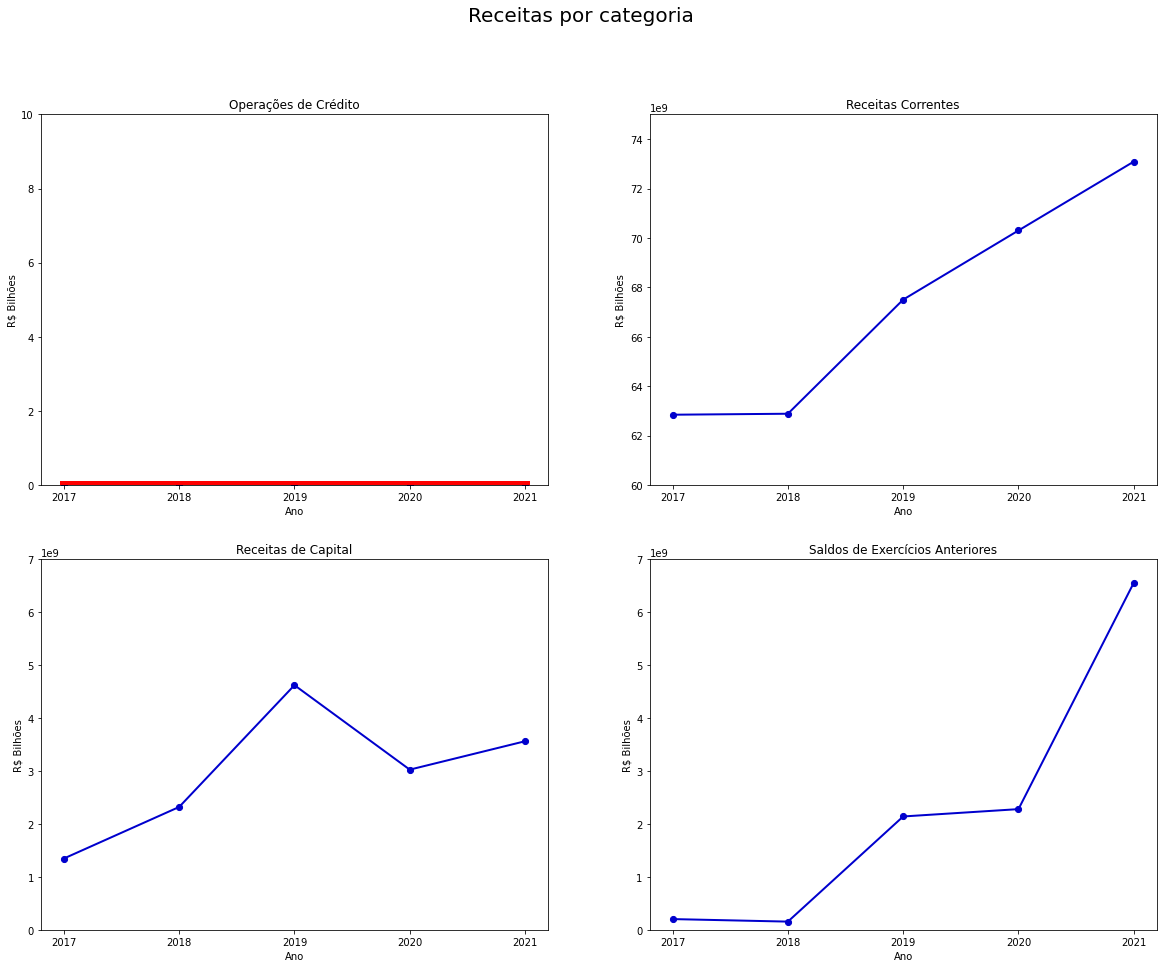

In [464]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize = (20,15))
fig1.suptitle("Receitas por categoria", size=20)

f1_axes[0,0].set_ylim(0, 79e9)
f1_axes[0,1].set_ylim(60e9, 75e9)
f1_axes[1,0].set_ylim(0, 7e9)
f1_axes[1,1].set_ylim(0, 7e9)

f1_axes[0,0].plot(serie_credito, linestyle= '-', linewidth = 9, color = 'red')
f1_axes[0,1].plot(serie_corrente, linestyle= '-', linewidth = 2, color = "mediumblue")
f1_axes[1,0].plot(serie_capital, linestyle= '-', linewidth = 2, color = "mediumblue")
f1_axes[1,1].plot(serie_saldos, linestyle= '-', linewidth = 2, color = "mediumblue")

f1_axes[0,0].set_title('Operações de Crédito')
f1_axes[0,1].set_title('Receitas Correntes')
f1_axes[1,0].set_title('Receitas de Capital')
f1_axes[1,1].set_title('Saldos de Exercícios Anteriores')

f1_axes[0,0].set_xlabel('Ano')
f1_axes[0,1].set_xlabel('Ano')
f1_axes[1,0].set_xlabel('Ano')
f1_axes[1,1].set_xlabel('Ano')

f1_axes[0,0].set_ylabel('R$ Bilhões')
f1_axes[0,1].set_ylabel('R$ Bilhões')
f1_axes[1,0].set_ylabel('R$ Bilhões')
f1_axes[1,1].set_ylabel('R$ Bilhões')

f1_axes[0,0].axis(ymin=0,ymax=10)
#f1_axes[0,0].ticklabel_format(style='sci', axis='y', scilimits=(9,9))
f1_axes[0,1].ticklabel_format(style='sci', axis='y',scilimits=(9,9))
f1_axes[1,0].ticklabel_format(style='sci', axis='y',scilimits=(9,9))
f1_axes[1,1].ticklabel_format(style='sci', axis='y',scilimits=(9,9))

#f1_axes[0,0].axis(ymin=0,ymax=72000000000)

f1_axes[0,0].scatter(serie_credito.index, serie_credito[0], color = "mediumblue", marker = ".", s =
150)
f1_axes[0,1].scatter(serie_corrente.index, serie_corrente[0], color = "mediumblue", marker = ".", s =
150)
f1_axes[1,0].scatter(serie_capital.index, serie_capital[0], color = "mediumblue", marker = ".", s =
150)
f1_axes[1,1].scatter(serie_saldos.index, serie_saldos[0], color = "mediumblue", marker = ".", s =
150)

plt.savefig('grafico2.png', transparent = True)

7.3 

In [465]:
'''
Formando um dataframe com as receitas realizadas de todos os anos linha a linha
'''
df_total = pd.concat([df['2017']['Categoria'], df['2017']['Receitas_Realizadas']], axis=1, ignore_index=True)
df_total = pd.concat([df_total, df['2018']['Receitas_Realizadas']], axis=1, ignore_index=True)
df_total = pd.concat([df_total, df['2019']['Receitas_Realizadas']], axis=1, ignore_index=True)
df_total = pd.concat([df_total, df['2020']['Receitas_Realizadas']], axis=1, ignore_index=True)
df_total = pd.concat([df_total, df['2021']['Receitas_Realizadas']], axis=1, ignore_index=True)
df_total.columns = ['Categoria', '2017', '2018', '2019', '2020', '2021']

In [466]:
df_total

,Categoria,2017,2018,2019,2020,2021
RECEITAS ORÇAMENTÁRIAS,,,,,,
RECEITA TRIBUTÁRIA,RECEITAS CORRENTE,3.165459e+10,3.566721e+10,3.888067e+10,3.888822e+10,4.377135e+10
RECEITA DE CONTRIBUIÇÕES,RECEITAS CORRENTE,4.651160e+09,4.736998e+09,5.728853e+09,5.686587e+09,5.149676e+09
RECEITA PATRIMONIAL,RECEITAS CORRENTE,1.226195e+09,9.271229e+08,1.396119e+09,2.735958e+09,1.716641e+09
RECEITA AGROPECUÁRIA,RECEITAS CORRENTE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RECEITA INDUSTRIAL,RECEITAS CORRENTE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RECEITA DE SERVIÇOS,RECEITAS CORRENTE,6.781334e+08,3.090118e+08,2.893740e+08,4.996831e+08,2.897719e+08
TRANSFERÊNCIAS CORRENTES,RECEITAS CORRENTE,1.750966e+10,1.821181e+10,1.880227e+10,2.078308e+10,2.034601e+10
OUTRAS RECEITAS CORRENTES,RECEITAS CORRENTE,7.126218e+09,3.033289e+09,2.407117e+09,1.709026e+09,1.816134e+09
OPERAÇÕES DE CRÉDITO,RECEITAS DE CAPITAL,5.508162e+07,1.786037e+08,3.347870e+08,5.612165e+08,1.221780e+08


In [467]:
'''
Querys com os valores linha a linha, separados por categoria
'''
querysaldos = df_total.query('Categoria == ["SALDOS ANTERIORES"]')
querysaldos = querysaldos.drop(columns=['Categoria'])
querycredito = df_total.query('Categoria == ["OPERAÇÕES DE CRÉDITO"]')
querycredito = querycredito.drop(columns=['Categoria'])
querycorrente = df_total.query('Categoria == ["RECEITAS CORRENTE"]')
querycorrente = querycorrente.drop(columns=['Categoria'])
querycapital = df_total.query('Categoria == ["RECEITAS DE CAPITAL"]')
querycapital = querycapital.drop(columns=['Categoria'])


In [468]:
querysaldos =   querysaldos.T   
querycredito =   querycredito.T
querycorrente =   querycorrente.T
querycapital =   querycapital.T 

In [469]:
querysaldos

RECEITAS ORÇAMENTÁRIAS,RECURSOS ARRECADADOS EM EXERCÍCIOS ANTERIORES,SUPERAVIT FINANCEIRO,REABERTURA DE CRÉDITOS ADICIONAIS
2017,0.0,2.023454e+08,0.0
2018,0.0,1.546738e+08,0.0
2019,0.0,2.140512e+09,0.0
2020,0.0,2.279084e+09,0.0
2021,0.0,6.553710e+09,0.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

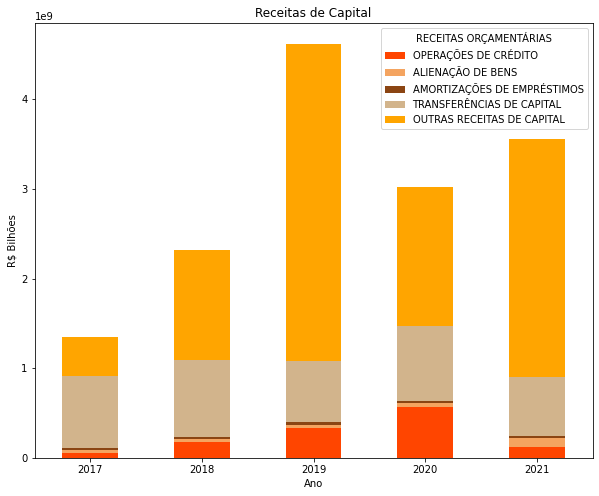

In [470]:
colors = [ 'orangered','sandybrown', 'saddlebrown',  'tan', 'orange']
querycapital.plot(kind="bar",stacked=True,figsize=(10,8), color= colors)
plt.ylabel('R$ Bilhões')
plt.xlabel('Ano')
plt.title('Receitas de Capital')
plt.xticks(rotation=360)

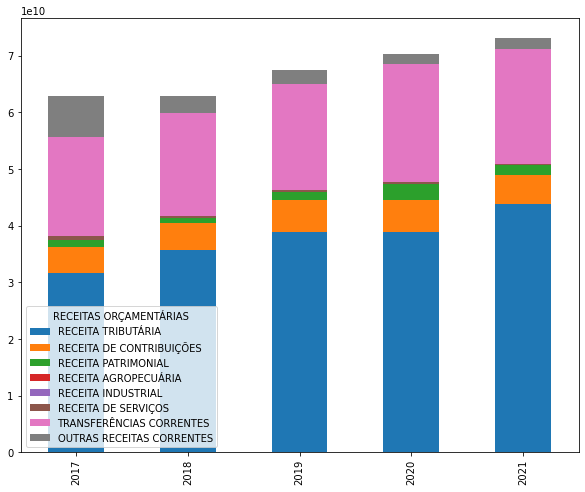

In [471]:
querycorrente.plot(kind="bar",stacked=True,figsize=(10,8))

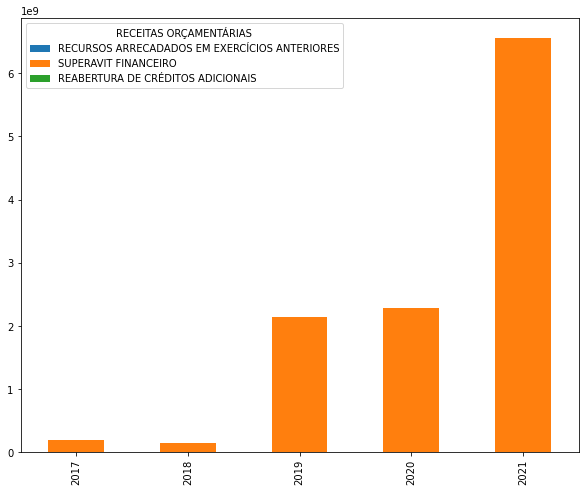

In [472]:
querysaldos.plot(kind="bar",stacked=True,figsize=(10,8))

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

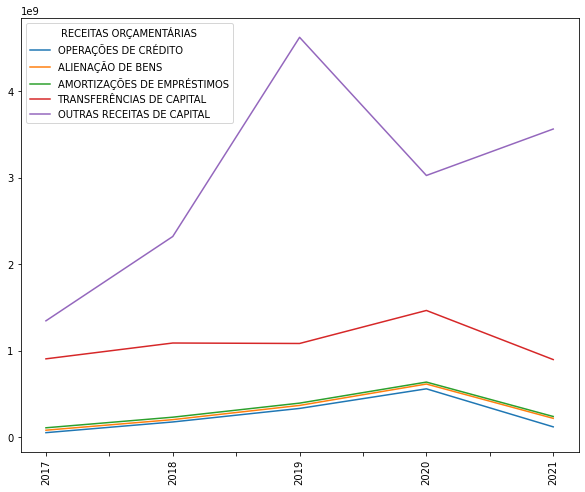

In [473]:
querycapital.plot(stacked=True,figsize=(10,8))
plt.xticks(rotation=90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

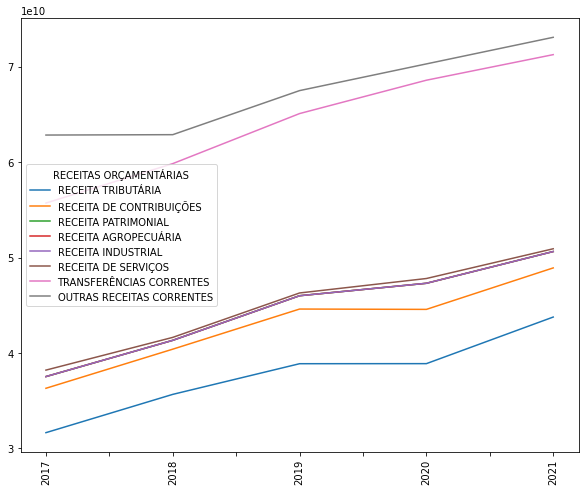

In [474]:
querycorrente.plot(stacked=True,figsize=(10,8))
plt.xticks(rotation=90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

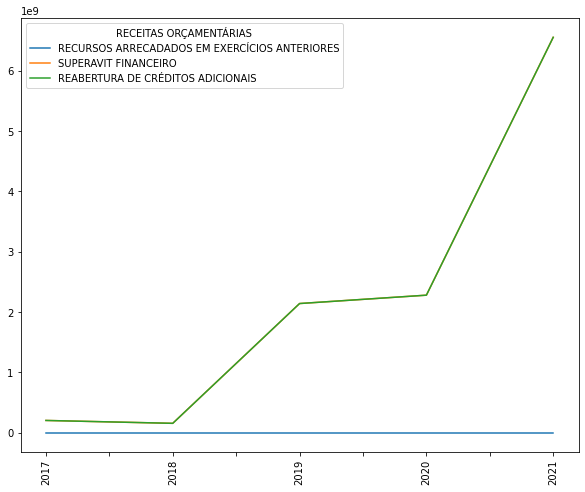

In [475]:
querysaldos.plot(stacked=True,figsize=(10,8))
plt.xticks(rotation=90)

In [476]:
type(querysaldos)

pandas.core.frame.DataFrame

7.3 Análise Vertical

In [477]:
'''
Criando um Dataframe com os valores da análise vertical obtidos na etapa 6
'''
df_av = pd.concat([df['2017']['Categoria'], df['2017']['AV']], axis=1, ignore_index=True)
df_av = pd.concat([df_av, df['2018']['AV']], axis=1, ignore_index=True)
df_av = pd.concat([df_av, df['2019']['AV']], axis=1, ignore_index=True)
df_av = pd.concat([df_av, df['2020']['AV']], axis=1, ignore_index=True)
df_av = pd.concat([df_av, df['2021']['AV']], axis=1, ignore_index=True)

In [478]:
df_av

,0,1,2,3,4,5,6,7,8,9
RECEITAS ORÇAMENTÁRIAS,,,,,,,,,,
RECEITA TRIBUTÁRIA,RECEITAS CORRENTE,49.31,54.7,53.91,53.03,57.1,54.70,53.91,53.03,57.10
RECEITA DE CONTRIBUIÇÕES,RECEITAS CORRENTE,7.25,7.26,7.94,7.76,6.72,7.26,7.94,7.76,6.72
RECEITA PATRIMONIAL,RECEITAS CORRENTE,1.91,1.42,1.94,3.73,2.24,1.42,1.94,3.73,2.24
RECEITA AGROPECUÁRIA,RECEITAS CORRENTE,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
RECEITA INDUSTRIAL,RECEITAS CORRENTE,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
RECEITA DE SERVIÇOS,RECEITAS CORRENTE,1.06,0.47,0.4,0.68,0.38,0.47,0.40,0.68,0.38
TRANSFERÊNCIAS CORRENTES,RECEITAS CORRENTE,27.28,27.93,26.07,28.34,26.54,27.93,26.07,28.34,26.54
OUTRAS RECEITAS CORRENTES,RECEITAS CORRENTE,11.1,4.65,3.34,2.33,2.37,4.65,3.34,2.33,2.37
OPERAÇÕES DE CRÉDITO,RECEITAS DE CAPITAL,0.09,0.27,0.46,0.77,0.16,0.27,0.46,0.77,0.16


In [480]:
df_av.columns = ['Categoria', '2017', '2018', '2019', '2020', '2021']

ValueError: ignored

In [ ]:
df_av_saldos = df_av.query('Categoria == ["SALDOS ANTERIORES"]')
df_av_saldos = df_av_saldos.drop(columns=['Categoria'])
df_av_credito = df_av.query('Categoria == ["OPERAÇÕES DE CRÉDITO"]')
df_av_credito = df_av_credito.drop(columns=['Categoria'])
df_av_corrente = df_av.query('Categoria == ["RECEITAS CORRENTE"]')
df_av_corrente = df_av_corrente.drop(columns=['Categoria'])
df_av_capital = df_av.query('Categoria == ["RECEITAS DE CAPITAL"]')
df_av_capital = df_av_capital.drop(columns=['Categoria'])

df_av_saldos =   df_av_saldos.T   
df_av_credito =   df_av_credito.T
df_av_corrente =   df_av_corrente.T
df_av_capital =   df_av_capital.T 

In [ ]:

df_av_capital.plot(stacked=True,figsize=(10,8))
plt.xticks(rotation=90)

In [481]:
df_av = df_av.T
df_av.head(n=30)
df_av.drop('Categoria')
#.plot(stacked=True, figsize=(20,16))

KeyError: ignored

7.4 Análise Horizontal

In [ ]:
'''
Criando um Dataframe com os valores da análise horizontal obtidos na etapa 6
'''
df_ah = pd.concat([df['2017']['Categoria'], df['2017']['AH']], axis=1, ignore_index=True)
df_ah = pd.concat([df_ah, df['2018']['AH']], axis=1, ignore_index=True)
df_ah = pd.concat([df_ah, df['2019']['AH']], axis=1, ignore_index=True)
df_ah = pd.concat([df_ah, df['2020']['AH']], axis=1, ignore_index=True)
df_ah = pd.concat([df_ah, df['2021']['AH']], axis=1, ignore_index=True)
df_ah.columns = ['Categoria', '2017', '2018', '2019', '2020', '2021']

df_ah_saldos = df_ah.query('Categoria == ["SALDOS ANTERIORES"]')
df_ah_saldos = df_ah_saldos.drop(columns=['Categoria'])
df_ah_credito = df_ah.query('Categoria == ["OPERAÇÕES DE CRÉDITO"]')
df_ah_credito = df_ah_credito.drop(columns=['Categoria'])
df_ah_corrente = df_ah.query('Categoria == ["RECEITAS CORRENTE"]')
df_ah_corrente = df_ah_corrente.drop(columns=['Categoria'])
df_ah_capital = df_ah.query('Categoria == ["RECEITAS DE CAPITAL"]')
df_ah_capital = df_ah_capital.drop(columns=['Categoria'])

df_ah_saldos =   df_ah_saldos.T   
df_ah_credito =   df_ah_credito.T
df_ah_corrente =   df_ah_corrente.T
df_ah_capital =   df_ah_capital.T 

In [ ]:
df_ah_corrente

In [ ]:

df_ah_corrente.plot(kind= 'bar', stacked=True,figsize=(10,8))
plt.xticks(rotation=90)

In [ ]:
colors = ['r', 'r', 'b', 'r', 'b']
plt.axhline(1, color='k')
plt.scatter(q_execucao.index, q_execucao['execução'],c=colors)